In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import math as mth
import datetime as dt

In [2]:
hyp = pd.read_csv('C:/Users/sokolovae/Documents/project/hypothesis.csv')
orders = pd.read_csv('C:/Users/sokolovae/Documents/project/orders.csv')
visitors = pd.read_csv('C:/Users/sokolovae/Documents/project/visitors.csv')

In [3]:
hyp

,Unnamed: 0,Hypothesis,Reach,Impact,Confidence,Efforts
0,0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,7,Добавить форму подписки на все основные страни...,10,7,8,5
8,8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
del hyp['Unnamed: 0']
del orders['Unnamed: 0']
del visitors['Unnamed: 0']

In [5]:
hyp.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [6]:
hyp.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [10]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


Приведем столбы с датами в таблицах в формат даты:

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
visitors.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

### Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез:

In [39]:
hyp['ICE'] = hyp['impact']*hyp['confidence']/hyp['efforts']
hyp.sort_values('ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Применим фреймворк RICE для приоритизации гипотез:

In [40]:
hyp['RICE'] = hyp['reach']*hyp['impact']*hyp['confidence']/hyp['efforts']
hyp.sort_values('RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


С третьего(по показателю ICE) на первое место(по показателю RICE) переместилась приоритизация гипотезы по добавлению формы подписки на все основные страницы, т.к. параметр reach(охват) у нее самый большой. И наоборот, гипотеза под номером 8 с первого места по показателю ICE переместилась на пятое место из-за наименьшего охвата(reach).

### Часть 2. Анализ A/B-теста

Соберём агрегированные кумулятивные по дням данные о заказах:

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки по группам:

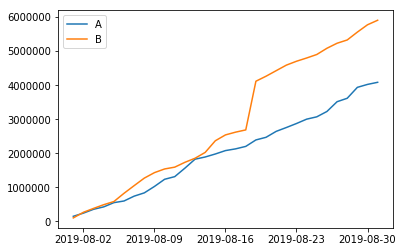

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()

Согласно графику выручка в обоих группах теста растет, но в обоих графиках есть резкие точки роста. Возможно имеются выбросы по числу или стоимости заказов.

Построим графики среднего чека по группам:

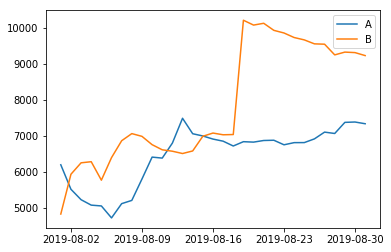

In [21]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()

Средний чек группы А в начале теста имел снижение, в середине теста имел резкий рост, в конце теста становится равномерным. Возможно в эту группу в начале теста попали товары с низкой стоимостью.

Средний чек группы В в середине теста имел очень резкий рост, возможно в эту группу попали очень дорогие заказы.

Построим график относительного различия для среднего чека группы B к группе A:

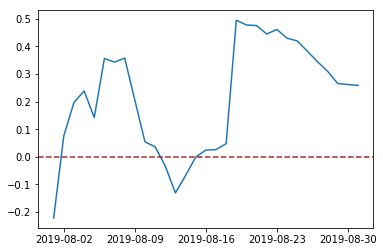

In [22]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='brown', linestyle='--')

В некоторых точках графика резко скачет, скорее всего это происходит из-за выбросов.

Проанализируем график кумулятивной конверсии по группам:

[Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-08-31 00:00:00'),
 0.025,
 0.03685636856368564]

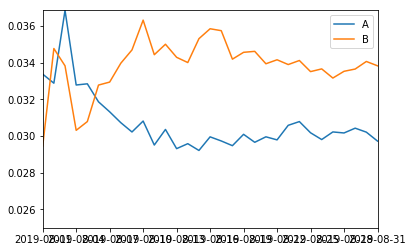

In [23]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([cummulativeData['date'].min(), 
          cummulativeData['date'].max(), 
          0.025, 
          cummulativeData['conversion'].max()])

В начале теста конверсии обеих групп колебались, затем конверсия группы А вырвалась вперед и зафиксировалась, а конверсия группы В просела и тоже зафиксировалась.

Построим график относительного изменения кумулятивной конверсии группы B к группе A:

[Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'), -0.3, 0.3]

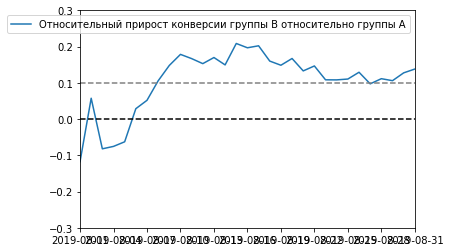

In [24]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([cummulativeData['date'].min(), 
          cummulativeData['date'].max(), 
          -0.3, 
          0.3])

В начале теста значение отношения конверсий колебались, но затем прирост конверсии группы B относительно группы А  вошел в положительную зону и практически зафиксировался на одном уровне.

Построим точечный график количества заказов по пользователям и посчитаем 90-й, 95-й и 99-й перцентили количества заказов на пользователя.:

In [25]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

ordersByUsers.columns = ['userId','orders']

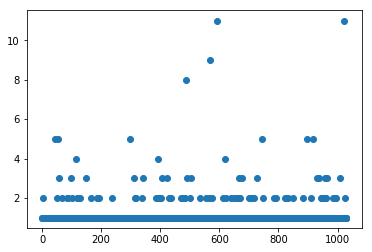

In [26]:
plt.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders'])

На основании графика можно сделать вывод, что число заказов равное трем уже достаточно редкое

In [27]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% клиентов совершили больше 2 заказов и не более 1% клиентов сделали больше 4 заказов. Имеет смысл выбрать 3 заказа за нижнюю границу числа заказов.

Построим точечный график стимостей заказов по пользователям и посчитаем 90-й, 95-й и 99-й перцентили стоимостей заказов на пользователя.:

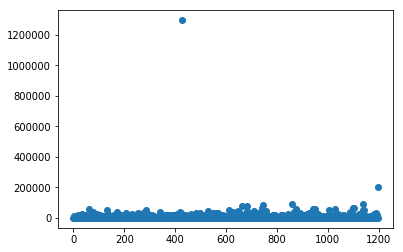

In [28]:
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])

По графику сложно определить нижнюю границу стоимости заказов, явно выделяются 2 заказа стоимостью более 150000. Зададим границы осей с ценой до 150000:

[0, 1197, 0, 150000]

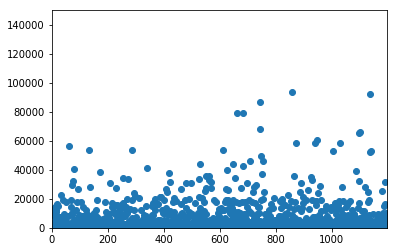

In [29]:
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.axis([0, len(orders['revenue']), 0, 150000])

In [30]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% клиентов совершили покупок на сумму более 28000 и не более 1% клиентов совершили покупок на сумму более 58233,2. Судя по графику и посчитанным перцинтилям имеет смысл выбрать 50000 за нижнюю границу стоимости заказов.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:

In [31]:
# создаем массив  количества посетителей группы А по дате:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# создаем массив с комулятивным количеством посетителей группы А до выбранной даты включительно:
visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# создаем массив  количества посетителей группы В по дате:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# создаем массив с коммулятивным количеством посетителей группы В до выбранной даты включительно:
visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# выделяем из таблицы с заказами количество покупок и общую сумму покупок клиентов группы А, сгруппированных по дате:
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# находим коммулятивные значения количества заказов и суммы заказов группы А до выбранной даты включительно:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# выделяем из таблицы с заказами количество покупок и общую сумму покупок клиентов группы В, сгруппированных по дате:
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# находим коммулятивные значения количества заказов и суммы заказов группы В до выбранной даты включительно:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Соединяем полученные данные в один датафрейм:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [32]:
# создадим переменную группы А,в которой для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

# создадим переменную группы В, в которой для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange\
                               (data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange\
                               (data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
#проверим нулевую гипотезу
stats.mannwhitneyu(sampleA, sampleB)[1]

0.008396177528376304

In [34]:
#найдем статистическую значимость различий в конверсии между группами по «сырым» данным
sampleB.mean()/sampleA.mean()-1

0.13807884655320146

ВЫВОД О КОНВЕРСИИ МЕЖДУ ГРУППАМИ ПО "СЫРЫМ" ДАННЫМ

P-value меньше 0.05 — нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергать нельзя. Конверсия группы В на 13,8% лучше, чем конверсия группы А. На выводы могли повлиять аномальные значения.

In [35]:
# Найдём относительные различия в среднем чеке между группами:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


ВЫВОД О РАЗЛИЧИИ В СРЕДНЕМ ЧЕКЕ МЕЖДУ ГРУППАМИ ПО "СЫРЫМ" ДАННЫМ

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно больше среднего чека группы A. Возможно на выводы повлияли выбросы.

Узнаем, сколько всего пользователей с аномальным количеством заказов и аномальной суммой заказа:

In [36]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

len(abnormalUsers)

26

Применим статистический критерий Манна-Уитни к выборкам без выбросов:

In [37]:
sampleAFiltered = (pd.concat
                   ([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders']
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                                ,name='orders')],axis=0)
                  )

sampleBFiltered = (pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders']
                              ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                         ,name='orders')],axis=0)
                  )

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006
0.158


ВЫВОД О КОНВЕРСИИ МЕЖДУ ГРУППАМИ ПО "ОЧИЩЕННЫМ" ДАННЫМ

P-value меньше 0.05 — нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергать нельзя. Конверсия группы В на 15,8% лучше, чем конверсия группы А. 

По сравнению с расчетами по сырым данным P-value стал еще меньше, а конверия группы В увеличилась по сравнению с конверией группы А с 13,8% до 15,8%.

Найдём относительные различия в среднем чеке между группами без выбросов:

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.409
0.024


ВЫВОД О РАЗЛИЧИИ В СРЕДНЕМ ЧЕКЕ МЕЖДУ ГРУППАМИ ПО "ОЧИЩЕННЫМ" ДАННЫМ

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B незначительно больше среднего чека группы A. 

По сравнению с расчетами с выбросами P-value еще более увеличился, а разница в средних чеках наоборот значительно уменьшилась.

#### ОБЩИЙ ВЫВОД:

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. 
* По сырым данным и после фильтрации нет статистически значимого различия по среднему чеку между группами. 
* Данные по различию конверсии между группами сообщают, что результаты группы B значительно лучше группы A(на 15,8%). Различия в конверсии зафиксировались около среднего значения.
* После удаления аномалий различия между средними чеками в группах уменьшилось с 25,9% до 2,4%. 

Исходя из перечисленных фактов можно остановить тест, зафиксировав победу группы В. Ее средний чек незначительно превосходит другую группу, а конверсия серьезно увеличена по сравнению с группой А.